In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hqdataprofiler/cleaned-netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jacob\.cache\kagglehub\datasets\hqdataprofiler\cleaned-netflix-movies-and-tv-shows\versions\1


In [27]:
import pandas as pd

In [28]:
netflix_movies_tvShows = pd.read_csv(f"{path}/netflix_titles_CLEANED.csv")

In [29]:
netflix_movies_tvShows

,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

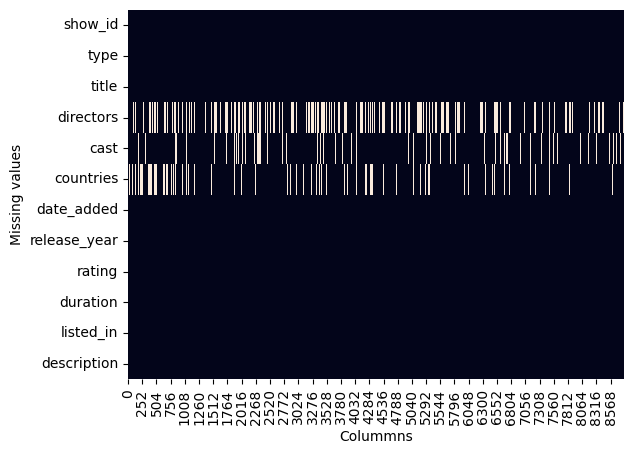

In [31]:
ax = plt.axes()
sns.heatmap(netflix_movies_tvShows.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Colummns")
plt.ylabel("Missing values")

plt.show()

In [32]:
import pandas as pd 
import numpy as np

# data frame testing: creating the semantic column

semantic_columns = ['title', 'listed_in', 'description']

df = pd.read_csv(fr"{path}\netflix_titles_CLEANED.csv", usecols=semantic_columns)

print(df.head())

                   title                                          listed_in  \
0   Dick Johnson Is Dead                                      Documentaries   
1          Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
2              Ganglands  Crime TV Shows, International TV Shows, TV Act...   
3  Jailbirds New Orleans                             Docuseries, Reality TV   
4           Kota Factory  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  


In [33]:
import pandas as pd 
import numpy as np

# converting all columns to a string

df["title"] = df["title"].astype(str)
df["listed_in"] = df["listed_in"].astype(str)
df["description"] = df["description"].astype(str)

print(df.head())

                   title                                          listed_in  \
0   Dick Johnson Is Dead                                      Documentaries   
1          Blood & Water    International TV Shows, TV Dramas, TV Mysteries   
2              Ganglands  Crime TV Shows, International TV Shows, TV Act...   
3  Jailbirds New Orleans                             Docuseries, Reality TV   
4           Kota Factory  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...  


In [34]:
import pandas as pd 
import numpy as np

# separator for combining the columns
separator = " [SEP] "

# creating the new combined columns
df['combined_text'] = df[['title', "listed_in", "description"]].apply(lambda row: separator.join(row.values.astype(str)), axis=1)

df["combined_text"].head(10)


0    Dick Johnson Is Dead [SEP] Documentaries [SEP]...
1    Blood & Water [SEP] International TV Shows, TV...
2    Ganglands [SEP] Crime TV Shows, International ...
3    Jailbirds New Orleans [SEP] Docuseries, Realit...
4    Kota Factory [SEP] International TV Shows, Rom...
5    Midnight Mass [SEP] TV Dramas, TV Horror, TV M...
6    My Little Pony: A New Generation [SEP] Childre...
7    Sankofa [SEP] Dramas, Independent Movies, Inte...
8    The Great British Baking Show [SEP] British TV...
9    The Starling [SEP] Comedies, Dramas [SEP] A wo...
Name: combined_text, dtype: object

In [35]:
# generating semantic embeddings for combined_text
import pandas as pd 
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# converted combined text to a list
all_combined_texts = df['combined_text'].tolist()

# encoding the list using sentence transformers
# Generate embeddings
embeddings = model.encode(
    all_combined_texts,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True
)

Batches:   0%|          | 0/276 [00:00<?, ?it/s]

In [36]:
# sanity checks
embeddings.shape

# looks like we are gucci

(8807, 384)

In [37]:
# fuzzy match all titles
all_titles = df["title"].tolist()

all_titles[:5]

['Dick Johnson Is Dead',
 'Blood & Water',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory']

In [ ]:
import difflib
from typing import Optional, Tuple, List

# fuzzy search function: searches for best match term when user searches
def fuzzy_search(query):
    # get matches
    closest_matches = difflib.get_close_matches(query, all_titles, n=1, cutoff=0.5)
    
    # if matched, return best title, else return none 
    if closest_matches:
        best_title = closest_matches[0]
        best_title_index = all_titles.index(best_title)
        return (best_title, best_title_index)
        print (best_title, best_title_index)
    else:
        return None
    
fuzzy_search('walkin dead')

('The Walking Dead', 390)

In [ ]:
import difflib
from typing import Optional, Tuple, List